In [120]:
#Delivery_time -> Predict delivery time using sorting time

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [122]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 84A1-6D3A

 Directory of C:\Users\hp\Documents\EXCELR\DS_Assign_Ans

07/25/2023  07:56 PM    <DIR>          .
04/05/2023  08:48 PM    <DIR>          ..
07/25/2023  06:31 PM    <DIR>          .ipynb_checkpoints
04/26/2023  08:47 AM    <DIR>          Basic_Stats_L1
04/26/2023  08:57 AM    <DIR>          Basic_Stats_L2
04/15/2023  10:24 PM    <DIR>          Clustering
07/19/2023  10:58 PM               218 delivery_time (1).csv
04/13/2023  03:16 PM    <DIR>          Hypothesis Testing
04/14/2023  10:57 PM    <DIR>          Logistic-Regression
04/14/2023  10:50 PM    <DIR>          Multi-Linear-Regression
07/19/2023  10:58 PM               454 Salary_Data (1).csv
07/25/2023  07:07 PM           214,186 Salary_hike-SLR.ipynb
04/14/2023  12:40 PM    <DIR>          Simple-Linear-Regression
07/25/2023  07:56 PM           105,002 Untitled.ipynb
07/25/2023  05:57 PM            75,754 Untitled1.ipynb
               5 File(s)        395,614 

In [123]:
data=pd.read_csv("delivery_time (1).csv")

In [124]:
data.head(5)

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [125]:
data.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [126]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [127]:
#Checking for null and Duplicate
data.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

In [128]:
data[data.duplicated()].shape

(0, 2)

In [129]:
data[data.duplicated()]

,Delivery Time,Sorting Time


In [130]:
#Ploting

Text(0, 0.5, 'Sorting Time')

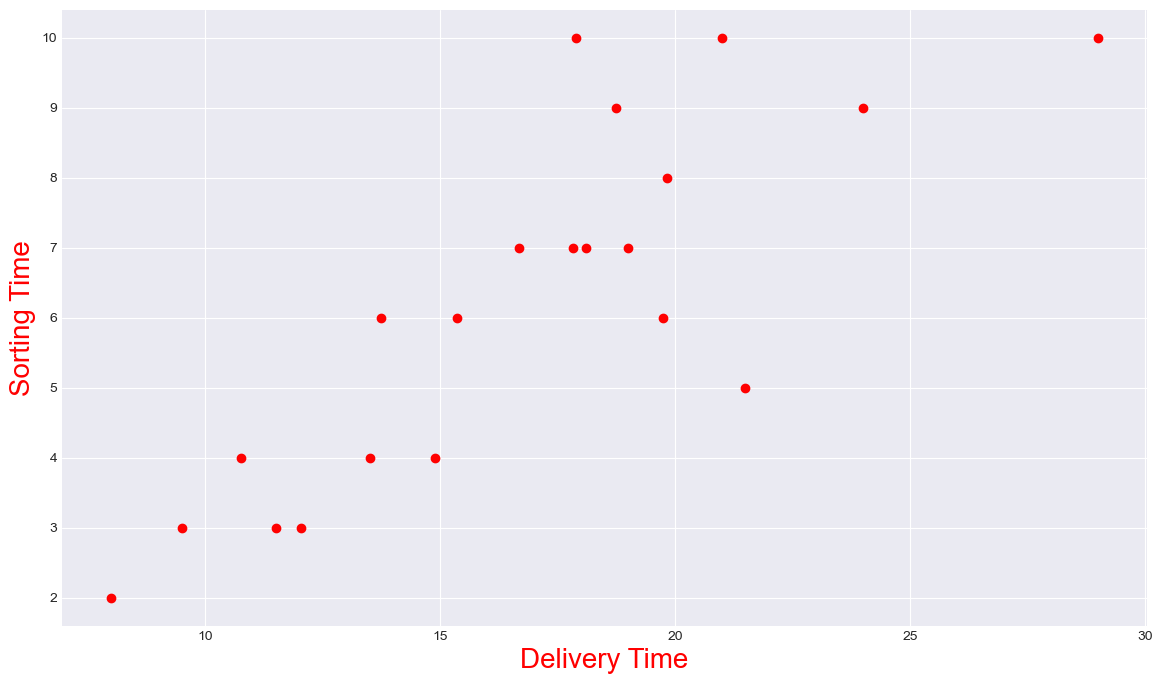

In [131]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["Delivery Time"],data["Sorting Time"],color="red")
plt.xlabel("Delivery Time",size=20,color="red")
plt.ylabel("Sorting Time",size=20,color="red")

In [132]:
#Correlation between Variables
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [133]:
#Model

In [134]:
model=LinearRegression()
model.fit(data[["Delivery Time"]],data["Sorting Time"])

LinearRegression()

In [135]:
yhat=model.predict(data[["Delivery Time"]])

Text(0, 0.5, 'Sorting Time')

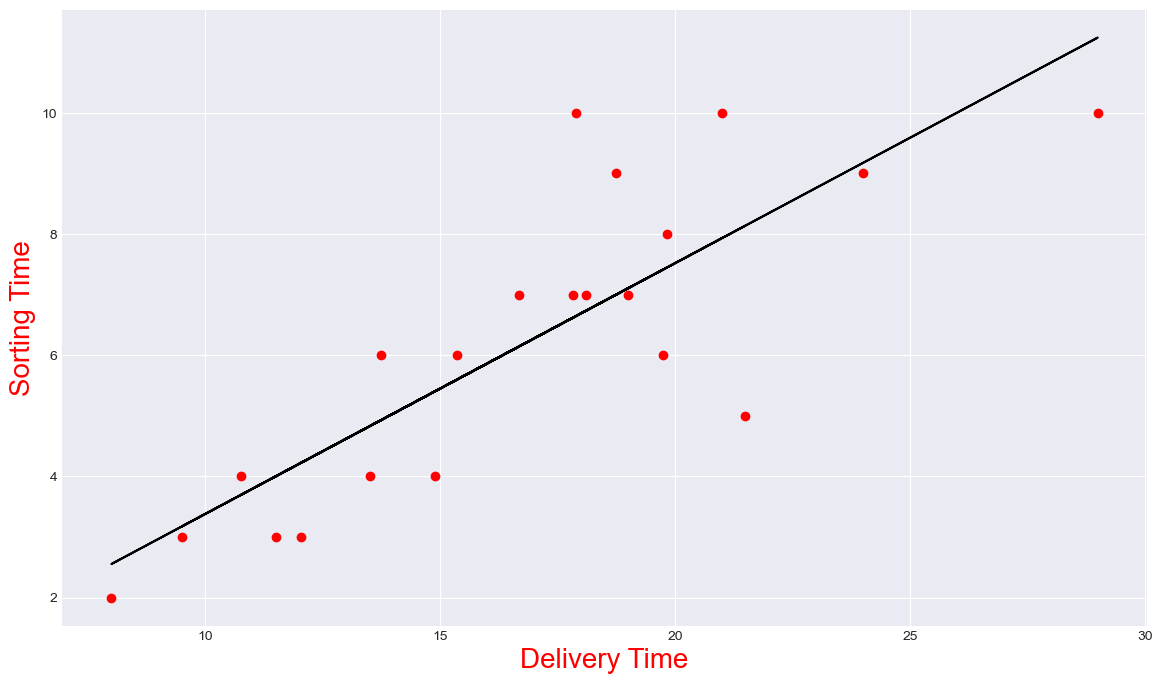

In [136]:
plt.figure(figsize=(14,8))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["Delivery Time"],data["Sorting Time"],color="red")
plt.plot(data["Delivery Time"],yhat,color="black")

plt.xlabel("Delivery Time",size=20,color="red")
plt.ylabel("Sorting Time",size=20,color="red")



In [137]:
model.intercept_

-0.7566733660351259

In [138]:
model.coef_

array([0.41374363])

In [139]:
#Model Testing

In [140]:
r2_score(data["Sorting Time"],yhat)

0.6822714748417231

In [141]:
#Another module for LR

In [ ]:
# Renaming Columns
#dataset=dataset.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
#dataset

In [142]:
import statsmodels.formula.api as smf

In [186]:
model1 = smf.ols("data['Delivery Time']~data['Sorting Time']", data = data).fit()

#model=smf.ols("Delivery Time~Sorting Time",data=dataset).fit()

In [187]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     data['Delivery Time']   R-squared:                       0.682
Model:                               OLS   Adj. R-squared:                  0.666
Method:                    Least Squares   F-statistic:                     40.80
Date:                   Tue, 25 Jul 2023   Prob (F-statistic):           3.98e-06
Time:                           21:04:27   Log-Likelihood:                -51.357
No. Observations:                     21   AIC:                             106.7
Df Residuals:                         19   BIC:                             108.8
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.5827      1.722      3.823      0.001       2.979      10.186
data['Sorting Time']     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [145]:
model2 = smf.ols("np.log(data['Delivery Time'])~np.log(data['Sorting Time'])", data = data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                 
=========================================================================================
Dep. Variable:     np.log(data['Delivery Time'])   R-squared:                       0.772
Model:                                       OLS   Adj. R-squared:                  0.760
Method:                            Least Squares   F-statistic:                     64.39
Date:                           Tue, 25 Jul 2023   Prob (F-statistic):           1.60e-07
Time:                                   19:59:25   Log-Likelihood:                 10.291
No. Observations:                             21   AIC:                            -16.58
Df Residuals:                                 19   BIC:                            -14.49
Df Model:                                      1                                         
Covariance Type:                       nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                        1.7420      0.133     13.086      0.000       1.463       2.021
np.log(data['Sorting Time'])     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [146]:
#No Improvement
model3 = smf.ols("np.sqrt(data['Delivery Time'])~np.sqrt(data['Sorting Time'])", data = data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.sqrt(data['Delivery Time'])   R-squared:                       0.729
Model:                                        OLS   Adj. R-squared:                  0.715
Method:                             Least Squares   F-statistic:                     51.16
Date:                            Tue, 25 Jul 2023   Prob (F-statistic):           8.48e-07
Time:                                    19:59:25   Log-Likelihood:                -5.7320
No. Observations:                              21   AIC:                             15.46
Df Residuals:                                  19   BIC:                             17.55
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.6135      0.349      4.628      0.000       0.884       2.343
np.sqrt(data['Sorting Time'])     1.0022      0.140      7.153      0.000       0.709       1.295
==============================================================================
Omnibus:                        2.869   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.238   Jarque-Bera (JB):                1.685
Skew:                           0.690   Prob(JB):                        0.431
Kurtosis:                       3.150   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [147]:
model4 = smf.ols("np.cbrt(data['Delivery Time'])~np.cbrt(data['Sorting Time'])", data = data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  OLS Regression Results                                  
==========================================================================================
Dep. Variable:     np.cbrt(data['Delivery Time'])   R-squared:                       0.744
Model:                                        OLS   Adj. R-squared:                  0.731
Method:                             Least Squares   F-statistic:                     55.25
Date:                            Tue, 25 Jul 2023   Prob (F-statistic):           4.90e-07
Time:                                    19:59:26   Log-Likelihood:                 13.035
No. Observations:                              21   AIC:                            -22.07
Df Residuals:                                  19   BIC:                            -19.98
Df Model:                                       1                                         
Covariance Type:                        nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         1.0136      0.207      4.900      0.000       0.581       1.447
np.cbrt(data['Sorting Time'])     0.8456      0.114      7.433      0.000       0.607       1.084
==============================================================================
Omnibus:                        2.570   Durbin-Watson:                   1.292
Prob(Omnibus):                  0.277   Jarque-Bera (JB):                1.532
Skew:                           0.661   Prob(JB):                        0.465
Kurtosis:                       3.075   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
'''
Model1 ==>68.2%
Model2 ==>77.2%
Model3 ==>72.9%
Model4 ==>74.4%
'''

'\nModel1 ==>68.2%\nModel2 ==>77.2%\nModel3 ==>72.9%\nModel4 ==>74.4%\n'

In [149]:
#Model Testing

In [157]:
model2.params

Intercept                       1.741987
np.log(data['Sorting Time'])    0.597522
dtype: float64

In [162]:
# Finding Pvalues and tvalues
model2.tvalues, model2.pvalues

(Intercept                       13.085552
 np.log(data['Sorting Time'])     8.024484
 dtype: float64,
 Intercept                       5.921137e-11
 np.log(data['Sorting Time'])    1.601539e-07
 dtype: float64)

In [163]:
model2.rsquared,model2.rsquared_adj

(0.77216134926874, 0.7601698413355158)

Text(0, 0.5, 'Sorting Time')

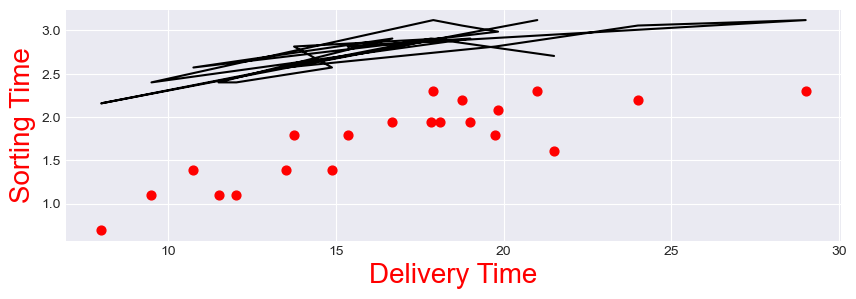

In [233]:

plt.figure(figsize=(10,3))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["Delivery Time"],np.log(data["Sorting Time"]),color="red",s=40)
plt.plot(data["Delivery Time"],model2.fittedvalues,color="black")

plt.xlabel("Delivery Time",size=20,color="red")
plt.ylabel("Sorting Time",size=20,color="red")

Text(0, 0.5, 'Sorting Time')

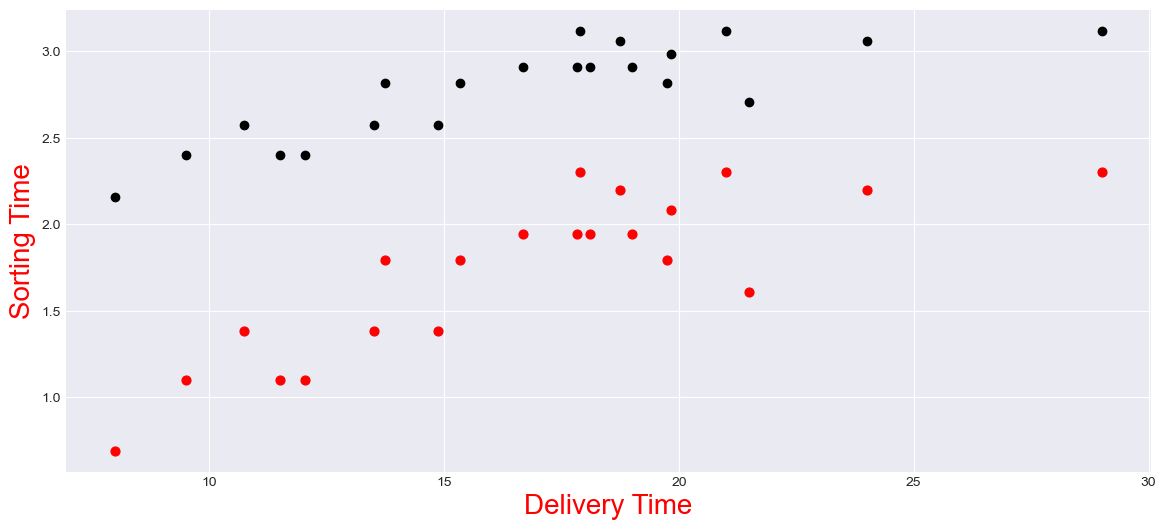

In [223]:
plt.rcParams ["figure.figsize"] = (10,5)
    
plt.figure(figsize=(14,6))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["Delivery Time"],np.log(data["Sorting Time"]),color="red",s=40)
plt.scatter(data["Delivery Time"],model2.fittedvalues,color="black")

plt.xlabel("Delivery Time",size=20,color="red")
plt.ylabel("Sorting Time",size=20,color="red")